# Exploratory Data Analysis

In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## get the data from csv
df = pd.read_csv("student_mat.csv", sep=';')

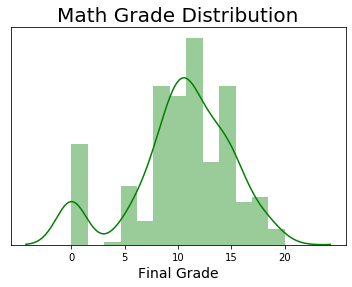

In [16]:
## check distribution of g3 for skewness
sns.distplot(df['G3'], color= 'green')
plt.xlabel("Final Grade", size = 14)
plt.title("Math Grade Distribution", size = 20)
plt.xticks([0, 5, 10, 15, 20])
plt.yticks([])
## plt.savefig("Math Grade Distribution.png", bbox_inches='tight', pad_inches = .25, dpi=300)
plt.show()


## Encode Final Grades into Binary Classification of Pass or Fail

In [20]:
# Create a list to store the data
grade_status = []

# For each row in the column,
for row in df['G3']:
    if row >= 10:
        grade_status.append(1)
    elif row < 10:
        grade_status.append(0)
        
# Create a column from the list
df['grade_status'] = grade_status

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grade_status
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,1


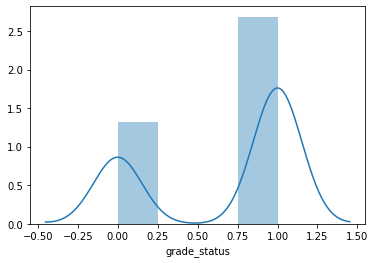

In [28]:
sns.distplot(df['grade_status'])

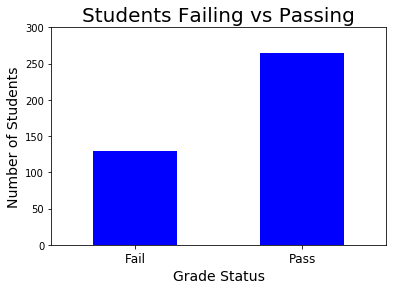

In [77]:
df.groupby('grade_status')['index'].nunique().plot(kind='bar', color = 'blue')
plt.title('Students Failing vs Passing', size = 20)
plt.ylabel('Number of Students', size = 14)
plt.xlabel('Grade Status', size = 14)
plt.xticks(np.arange(0, 2, step=1), ('Fail', 'Pass'), rotation = 360, size = 12)
plt.yticks(np.arange(0, 350, step = 50))
## plt.savefig("Failing versus Passing.png", bbox_inches='tight', pad_inches = .25, dpi=300) 
plt.show()

In [44]:
df.columns

Index(['index', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3',
       'grade_status'],
      dtype='object')

In [43]:
df.drop(columns = ['level_0'], inplace = True)

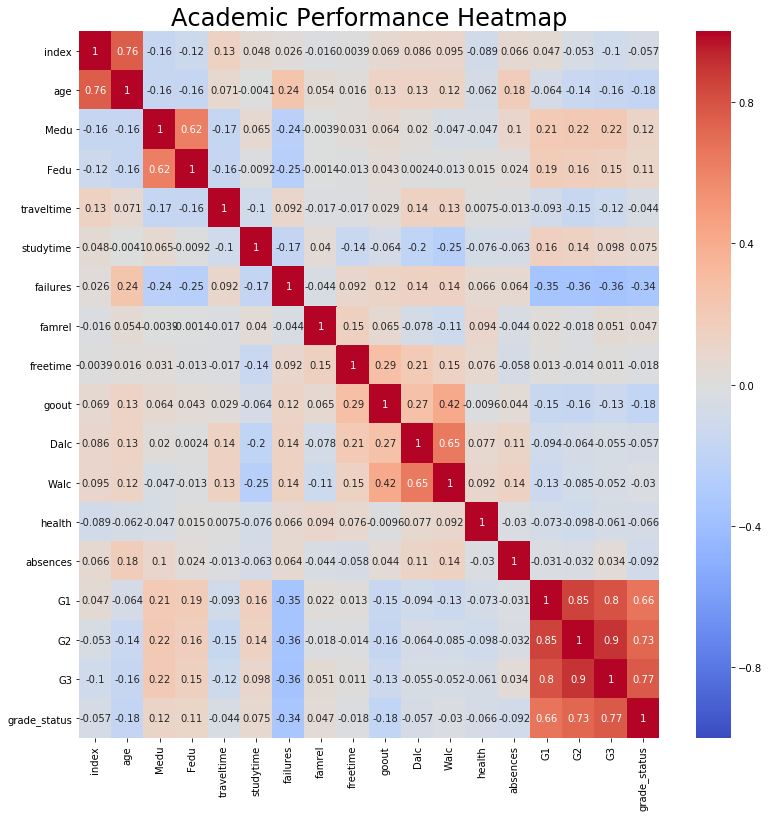

In [85]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Academic Performance Heatmap', size = 24)
## plt.savefig("Academic Performance Heatmap.png", bbox_inches='tight', pad_inches = .25, dpi=300)
plt.show()

## Baselines for Classification

In [87]:
df['grade_status'].value_counts()

1    265
0    130
Name: grade_status, dtype: int64

In [88]:
df['grade_status'].value_counts(normalize = True)

1    0.670886
0    0.329114
Name: grade_status, dtype: float64

This means that if I predicted that everyone passed, I would have 67% accuracy.

## Feature Encoding

In [89]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 

df['school']= le.fit_transform(df['school']) 
df['sex']= le.fit_transform(df['sex']) 
df['address']= le.fit_transform(df['address'])
df['famsize']= le.fit_transform(df['famsize']) 
df['Pstatus']= le.fit_transform(df['Pstatus']) 
df['Mjob']= le.fit_transform(df['Mjob']) 
df['Fjob']= le.fit_transform(df['Fjob']) 
df['reason']= le.fit_transform(df['reason']) 
df['guardian']= le.fit_transform(df['guardian']) 
df['schoolsup']= le.fit_transform(df['schoolsup']) 
df['famsup']= le.fit_transform(df['famsup']) 
df['paid']= le.fit_transform(df['paid']) 
df['activities']= le.fit_transform(df['activities']) 
df['nursery']= le.fit_transform(df['nursery']) 
df['higher']= le.fit_transform(df['higher']) 
df['internet']= le.fit_transform(df['internet']) 
df['romantic']= le.fit_transform(df['romantic']) 
df['grade_status']= le.fit_transform(df['grade_status']) 

In [90]:
df

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grade_status
0,0,0,0,18,1,0,0,4,4,0,...,3,4,1,1,3,6,5,6,6,0
1,1,0,0,17,1,0,1,1,1,0,...,3,3,1,1,3,4,5,5,6,0
2,2,0,0,15,1,1,1,1,1,0,...,3,2,2,3,3,10,7,8,10,1
3,3,0,0,15,1,0,1,4,2,1,...,2,2,1,1,5,2,15,14,15,1
4,4,0,0,16,1,0,1,3,3,2,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,1,1,20,1,1,0,2,2,3,...,5,4,4,5,4,11,9,9,9,0
391,391,1,1,17,1,1,1,3,1,3,...,4,5,3,4,2,3,14,16,16,1
392,392,1,1,21,0,0,1,1,1,2,...,5,3,3,3,3,3,10,8,7,0
393,393,1,1,18,0,1,1,3,2,3,...,4,1,3,4,5,0,11,12,10,1


In [91]:
df.isnull().sum()

index           0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
grade_status    0
dtype: int64

## Features Matrix and Target Vector

In [94]:
## drop grade columns and index 
## also drop index and school

X = df.drop(columns = ['grade_status', 'G1', 'G2', 'G3', 'index', 'school'])

y = df['grade_status']

## Split data into Training Data, Testing Data and Validation Data

In [99]:
from sklearn.model_selection import train_test_split

## first split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=14)


## next split train into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=14)

In [121]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(learning_rate=0.5,
                    n_estimators=1500,
                    max_depth=12,
                    min_child_weight=0,
                    gamma=0,
                    reg_lambda=1,
                    subsample=1,
                    colsample_bytree=0.75,
                    scale_pos_weight=1,
                    objective='multi:softprob',
                    num_class=3,
                    random_state=14)

model1 = xgbc.fit(X_train, y_train, eval_metric='auc')


In [122]:
y_pred = model1.predict(X_val)

In [123]:
accuracy_score(y_val, y_pred)

0.671875

In [165]:
y_pred_test1 = model1.predict(X_test)
accuracy_score(y_test, y_pred_test1)

0.6582278481012658

This model is barely beating the baseline.  What this means to me is that some of the features I excluded have the potential to help the model make better predictions and the features that I did include are not powerfully predicitve of student grades.  

## Feature Importances

In [129]:
feature_names = X.columns

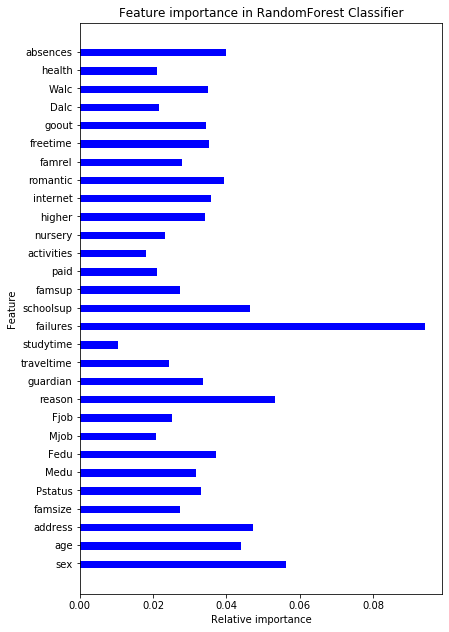

<Figure size 360x360 with 0 Axes>

In [156]:
col = feature_names

#modelname.feature_importance_
y = model1.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color='blue')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('Feature') 
plt.savefig("Feature Importances in RF Classifier.png", bbox_inches='tight', pad_inches = .25, dpi=300)
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 10.5, forward=True)
plt.show()

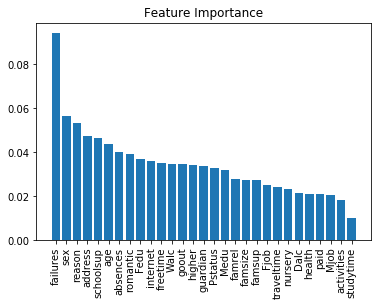

In [148]:
importances = model1.feature_importances_
indices = np.argsort(importances)[::-1]
names = [feature_names[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

## Make a new model including the previous terms grades G1, G2

In [158]:
## drop grade columns and index 
## also drop index and school

X1 = df.drop(columns = ['grade_status', 'G3', 'index', 'school'])

y1 = df['grade_status']

In [159]:
from sklearn.model_selection import train_test_split

## first split into train and test 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=14)


## next split train into training and validation
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.20, random_state=14)

In [162]:
xgbc = xgb.XGBClassifier(learning_rate=0.5,
                    n_estimators=1500,
                    max_depth=12,
                    min_child_weight=0,
                    gamma=0,
                    reg_lambda=1,
                    subsample=1,
                    colsample_bytree=0.75,
                    scale_pos_weight=1,
                    objective='multi:softprob',
                    num_class=3,
                    random_state=14)

model2 = xgbc.fit(X_train1, y_train1, eval_metric='auc')

In [163]:
y_pred = model2.predict(X_val1)

In [164]:
accuracy_score(y_val1, y_pred)

0.921875

In [168]:
y_pred_test2 = model2.predict(X_test1)
accuracy_score(y_test, y_pred_test2)

0.8481012658227848

## Regression Model to Predict Final Grade v1 with other term grades

In [190]:
X = df.drop(columns = ['G3', 'index', 'grade_status'])
y = df['G3']

In [191]:
## first split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=14)


## next split train into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=14)

In [192]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 14)
model.fit(X_train, y_train)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=14, verbose=0,
                      warm_start=False)

In [193]:
y_pred = model.predict(X_train)

In [194]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, y_pred)
mae

0.4115079365079365

In [195]:
from sklearn.metrics import r2_score
r_squared_g3 = r2_score(y_train, y_pred)
r_squared_g3

0.9728510709099709

In [196]:
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mae

0.996875

In [197]:
r_squared_g3 = r2_score(y_val, y_pred)
r_squared_g3

0.8436100856625665

In [200]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

1.360759493670886

In [201]:
r_squared_g3 = r2_score(y_test, y_pred)
r_squared_g3

0.7795141537446387

## Make another model without the earlier grades

In [179]:
X = df.drop(columns = ['G1', 'G2', 'G3', 'index', 'grade_status'])
y = df['G3']

In [180]:
## first split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=14)


## next split train into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=14)

In [181]:
model = RandomForestRegressor(random_state = 14)
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=14, verbose=0,
                      warm_start=False)

In [183]:
y_pred = model.predict(X_train)

In [184]:
mae = mean_absolute_error(y_train, y_pred)
mae

1.2456349206349207

In [185]:
r_squared_g3 = r2_score(y_train, y_pred)
r_squared_g3

0.8513298342207164

In [186]:
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mae

3.0546875

In [187]:
r_squared_g3 = r2_score(y_val, y_pred)
r_squared_g3

0.0508142932481932

In [188]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

3.1367088607594935

In [189]:
r_squared_g3 = r2_score(y_test, y_pred)
r_squared_g3

0.2264411745298579

## Linear Regression Model

In [202]:
X = df['absences']
y = df['G3']

In [203]:
## first split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=14)


## next split train into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=14)

In [220]:

from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(df[['absences']], df['G3'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [230]:
model.predict(np.array([9]).reshape(1, 1))

array([10.47971324])

In [218]:
df['absences'].value_counts()

0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
7       7
16      7
18      5
5       5
20      4
22      3
13      3
1       3
9       3
11      3
15      3
23      1
24      1
21      1
25      1
56      1
26      1
28      1
30      1
17      1
38      1
40      1
54      1
19      1
75      1
Name: absences, dtype: int64

# Visualization

In [231]:
x = sns.PairGrid(df)
x = x.map(plt.scatter)

Error in callback <function flush_figures at 0x11ada84d0> (for post_execute):


KeyboardInterrupt: 